<a href="https://colab.research.google.com/github/DurhamARC/openpose-music/blob/master/OpenPose_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pose Detection with OpenPose

This notebook uses an open source project [CMU-Perceptual-Computing-Lab/openpose](https://github.com/CMU-Perceptual-Computing-Lab/openpose.git) to detect/track multi person poses on a given youtube video.

For other deep-learning Colab notebooks, visit [tugstugi/dl-colab-notebooks](https://github.com/tugstugi/dl-colab-notebooks).


## Install OpenPose

In [0]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/CMU-Perceptual-Computing-Lab/openpose.git'
project_name = splitext(basename(git_repo_url))[0]
!rm -rf openpose
if not exists(project_name):
  # see: https://github.com/CMU-Perceptual-Computing-Lab/openpose/issues/949
  # install new CMake becaue of CUDA10
  #!apt upgrade cmake
  #!apt remove cmake
  #!apt autoremove
  !wget -q https://cmake.org/files/v3.17/cmake-3.17.2-Linux-x86_64.tar.gz
  !tar xfz cmake-3.17.2-Linux-x86_64.tar.gz --strip-components=1 -C /usr/local
  # clone openpose
  !git clone -q --depth 1 $git_repo_url
  # --recursive necessary in the line below, as otherwise you can (sometimes) get "lpthreads" errors in cmake ("undefined reference to `pthread_create'" etc). See, for example, https://github.com/facebookarchive/caffe2/issues/1234
  !sed -i 's/execute_process(COMMAND git checkout --recursive master WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/execute_process(COMMAND git checkout f019d0dfe86f49d1140961f8c7dec22130c83154 WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/g' openpose/CMakeLists.txt
  # install system dependencies
  !apt-get -qq install -y libatlas-base-dev libprotobuf-dev libleveldb-dev libsnappy-dev libhdf5-serial-dev protobuf-compiler libgflags-dev libgoogle-glog-dev liblmdb-dev opencl-headers ocl-icd-opencl-dev libviennacl-dev
  # build openpose
  !cd openpose && rm -rf build || true && mkdir build && cd build && cmake -DBUILD_PYTHON=ON .. && make -j`nproc`



Selecting previously unselected package libgflags2.2.
(Reading database ... 144433 files and directories currently installed.)
Preparing to unpack .../00-libgflags2.2_2.2.1-1_amd64.deb ...
Unpacking libgflags2.2 (2.2.1-1) ...
Selecting previously unselected package libgflags-dev.
Preparing to unpack .../01-libgflags-dev_2.2.1-1_amd64.deb ...
Unpacking libgflags-dev (2.2.1-1) ...
Selecting previously unselected package libgoogle-glog0v5.
Preparing to unpack .../02-libgoogle-glog0v5_0.3.5-1_amd64.deb ...
Unpacking libgoogle-glog0v5 (0.3.5-1) ...
Selecting previously unselected package libgoogle-glog-dev.
Preparing to unpack .../03-libgoogle-glog-dev_0.3.5-1_amd64.deb ...
Unpacking libgoogle-glog-dev (0.3.5-1) ...
Selecting previously unselected package libhdf5-serial-dev.
Preparing to unpack .../04-libhdf5-serial-dev_1.10.0-patch1+docs-4_all.deb ...
Unpacking libhdf5-serial-dev (1.10.0-patch1+docs-4) ...
Selecting previously unselected package libleveldb1v5:amd64.
Preparing to unpack ...

In [0]:
!pwd
#!cd build/examples/tutorial_api_python
#!python3 01_body_from_image.py

## Detect poses on a test video

Connect to Google Drive to access files on which to detect poses.

In [0]:
from google.colab import drive
drive.mount('/content/drive')
!ls '/content/drive/My Drive/Videos'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
NIR_VS_Bhoop_CentralClose_StereoMix.mp4


Download the above youtube video, cut the first 5 seconds and do the pose detection on that 5 seconds:

In [0]:
!rm -rf video.mp4
# cut the first 5 seconds
!ffmpeg -y -loglevel info -i "/content/drive/My Drive/Videos/NIR_VS_Bhoop_CentralClose_StereoMix.mp4" -t 5 video.mp4
# detect poses on the these 5 seconds
!rm -f openpose.avi
!cd openpose && ./build/examples/openpose/openpose.bin --video ../video.mp4 --write_json ./output/ --display 0 --part-candidates --write_video ../openpose.avi
# convert the result into MP4
!ffmpeg -y -loglevel info -i openpose.avi output.mp4

ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

Finally, visualize the result:

In [0]:
import numpy as np
import os
import cv2
import json
print('OpenCV - version: ',cv2.__version__)
import pandas as pd

# video file
cap = cv2.VideoCapture('video.mp4')

def get_vid_properties(): 
    width = int(cap.get(3))  # float
    height = int(cap.get(4)) # float
    cap.release()
    return width,height
  
print('Video Dimensions: ',get_vid_properties())

# Load keypoint data from JSON output
column_names = ['x', 'y', 'acc']

# Paths - should be the folder where Open Pose JSON output was stored
path_to_json = "openpose/output/"

# Import Json files, pos_json = position JSON
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
print('Found: ',len(json_files),'json keypoint frame files')
count = 0

width,height = get_vid_properties()

# instanciate dataframes 
body_keypoints_df = pd.DataFrame()
left_shoulder_df = pd.DataFrame()
left_elbow_df = pd.DataFrame()

print('json files: ',json_files[0])   

# Loop through all json files in output directory
# Each file is a frame in the video
# If multiple people are detected - choose the most centered high confidence points
for file in json_files:

    temp_df = json.load(open(path_to_json+file))
    temp = []
    for k,v in temp_df['part_candidates'][0].items():
        
        # Single point detected
        if len(v) < 4:
            temp.append(v)
            #print('Extracted highest confidence points: ',v)
            
        # Multiple points detected
        elif len(v) > 4: 
            near_middle = width
            np_v = np.array(v)
            
            # Reshape to x,y,confidence
            np_v_reshape = np_v.reshape(int(len(np_v)/3),3)
            np_v_temp = []
            # compare x values
            for pt in np_v_reshape:
                if(np.absolute(pt[0]-width/2)<near_middle):
                    near_middle = np.absolute(pt[0]-width/2)
                    np_v_temp = list(pt)
         
            temp.append(np_v_temp)
            #print('Extracted highest confidence points: ',np_v_temp)
        else:
            # No detection - record zeros
            temp.append([0,0,0])
            
    temp_df = pd.DataFrame(temp)
    temp_df = temp_df.fillna(0)
    #print(temp_df)

    try:
        prev_temp_df = temp_df
        body_keypoints_df= body_keypoints_df.append(temp_df)
        left_shoulder_df = left_shoulder_df.append(temp_df.iloc[5].astype(int))
        left_elbow_df = left_elbow_df.append(temp_df.iloc[6].astype(int))

    except:
        print('bad point set at: ', file)
        
body_keypoints_df.columns = column_names
left_shoulder_df.columns = column_names
left_elbow_df.columns = column_names

body_keypoints_df.reset_index()
left_shoulder_df = left_shoulder_df.reset_index(drop = True)
left_elbow_df = left_elbow_df.reset_index(drop = True)

print('length of merged keypoint set: ',body_keypoints_df.size)

print(left_shoulder_df.head())
print(left_elbow_df.head())

OpenCV - version:  4.1.2
Video Dimensions:  (768, 576)
Found:  125 json keypoint frame files
json files:  video_000000000104_keypoints.json
length of merged keypoint set:  9375
     x    y  acc
0  0.0  0.0  0.0
1  0.0  0.0  0.0
2  0.0  0.0  0.0
3  0.0  0.0  0.0
4  0.0  0.0  0.0
     x    y  acc
0  0.0  0.0  0.0
1  0.0  0.0  0.0
2  0.0  0.0  0.0
3  0.0  0.0  0.0
4  0.0  0.0  0.0


x      0.0
y      0.0
acc    0.0
Name: 0, dtype: float64
-15 15


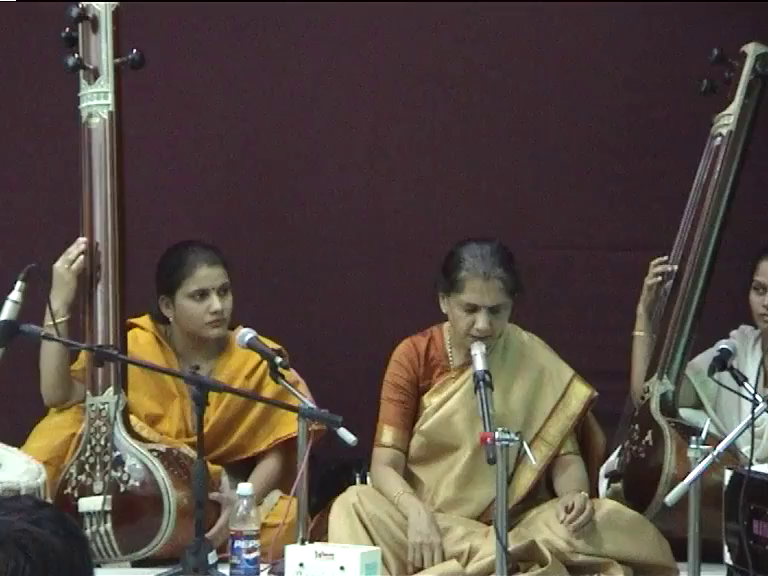

x      0.0
y      0.0
acc    0.0
Name: 1, dtype: float64
-15 15


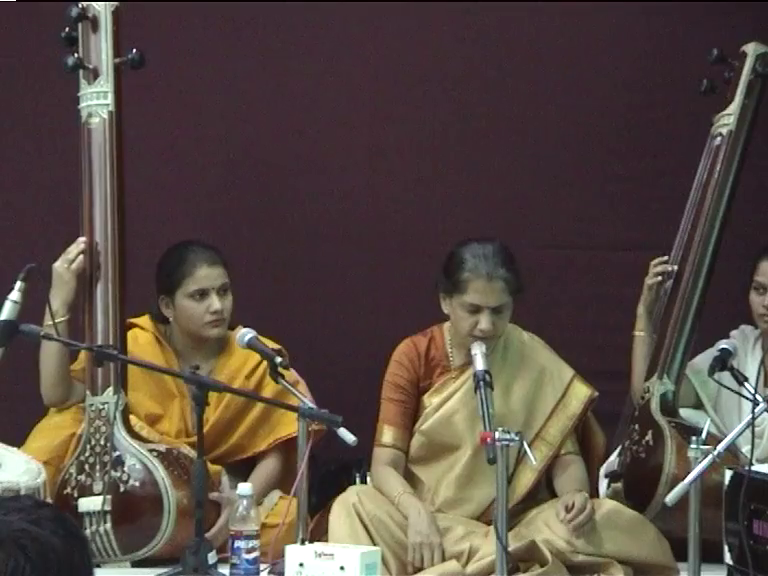

x      0.0
y      0.0
acc    0.0
Name: 2, dtype: float64
-15 15


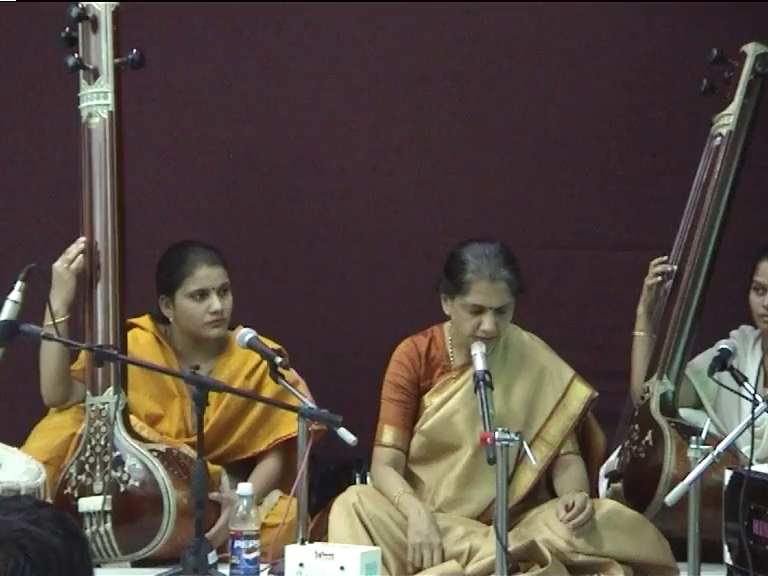

x      0.0
y      0.0
acc    0.0
Name: 3, dtype: float64
-15 15


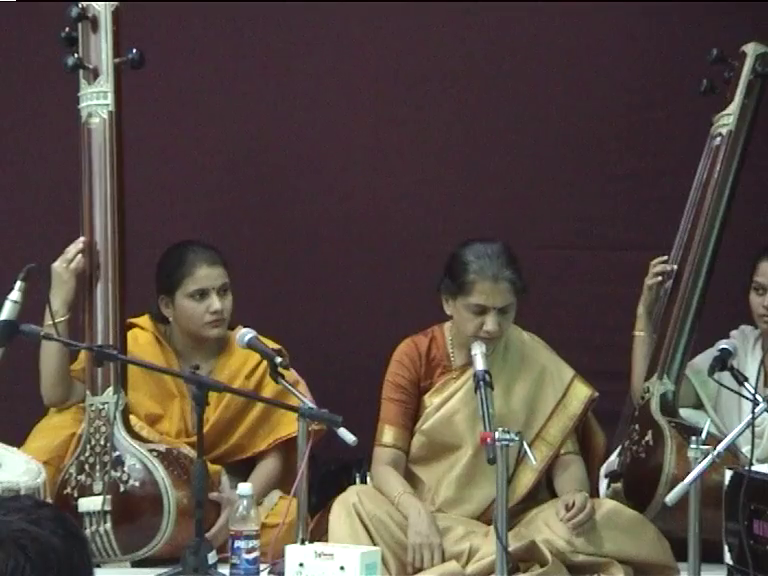

x      0.0
y      0.0
acc    0.0
Name: 4, dtype: float64
-15 15


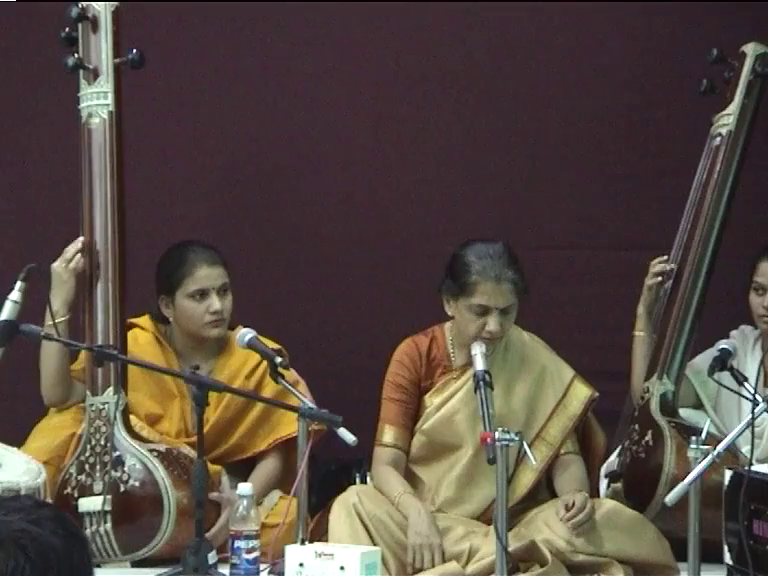

x      0.0
y      0.0
acc    0.0
Name: 5, dtype: float64
-15 15


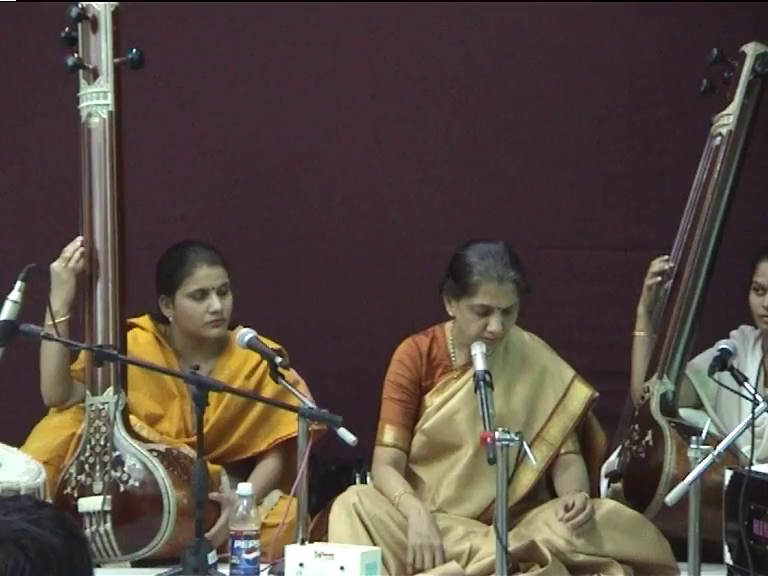

x      0.0
y      0.0
acc    0.0
Name: 6, dtype: float64
-15 15


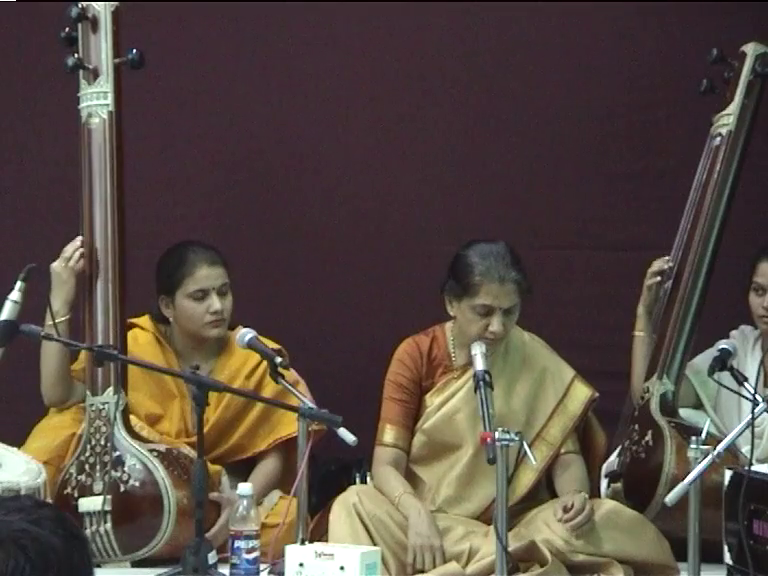

x      0.0
y      0.0
acc    0.0
Name: 7, dtype: float64
-15 15


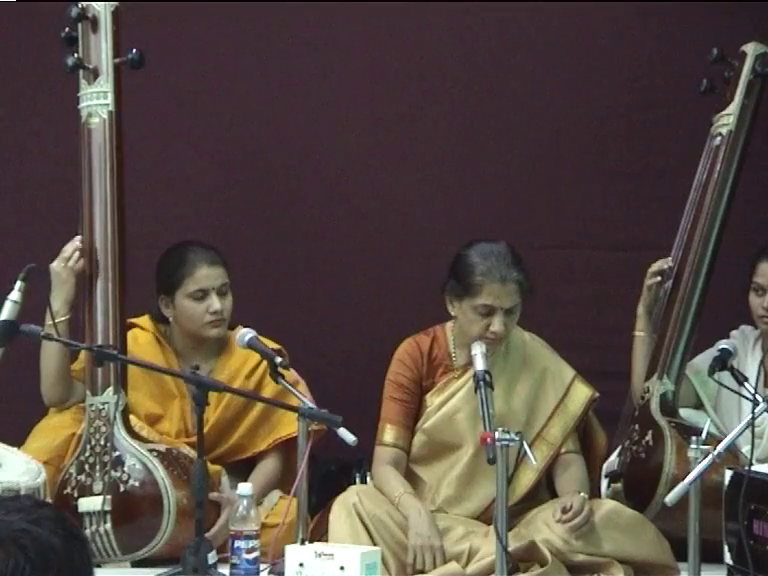

x      0.0
y      0.0
acc    0.0
Name: 8, dtype: float64
-15 15


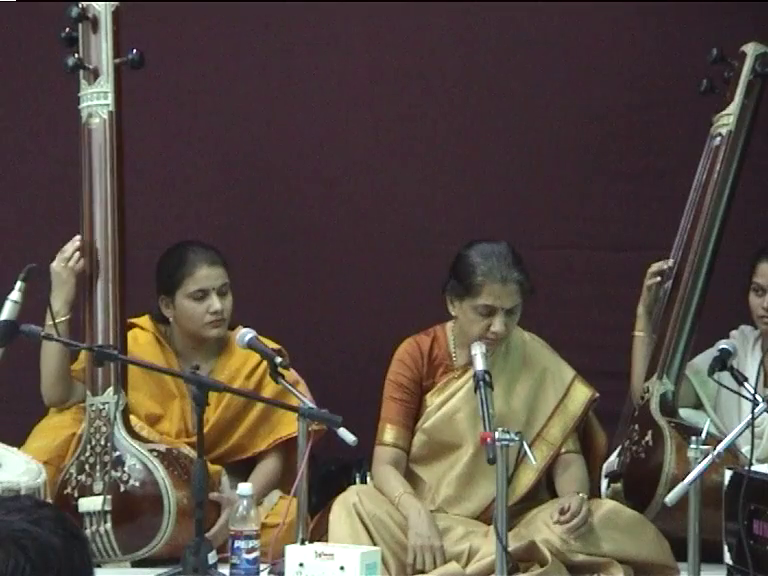

x      0.0
y      0.0
acc    0.0
Name: 9, dtype: float64
-15 15


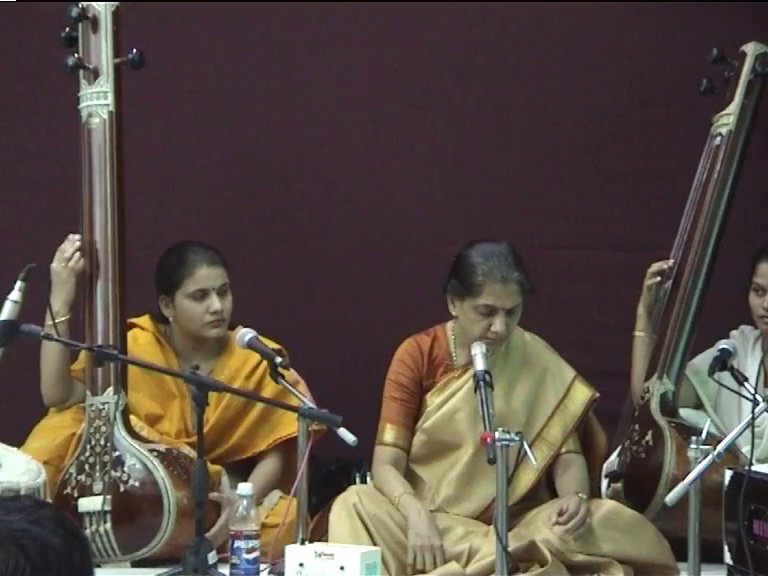

x      0.0
y      0.0
acc    0.0
Name: 10, dtype: float64
-15 15


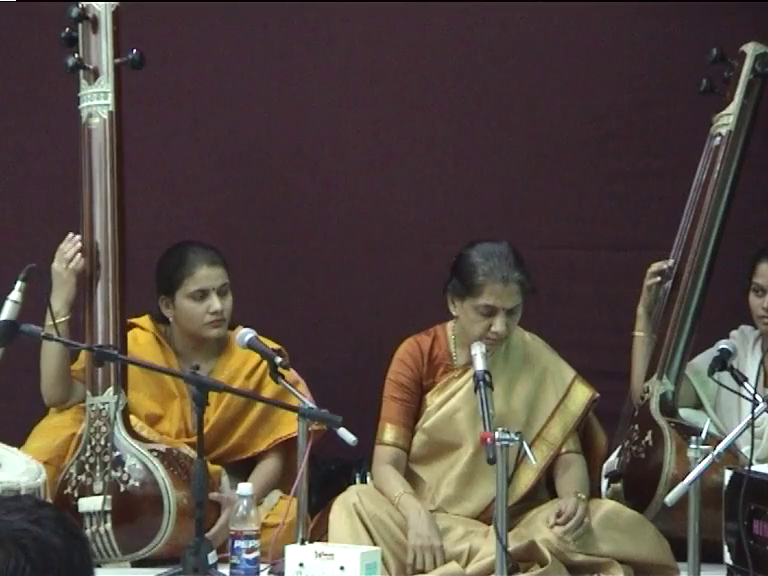

x      0.0
y      0.0
acc    0.0
Name: 11, dtype: float64
-15 15


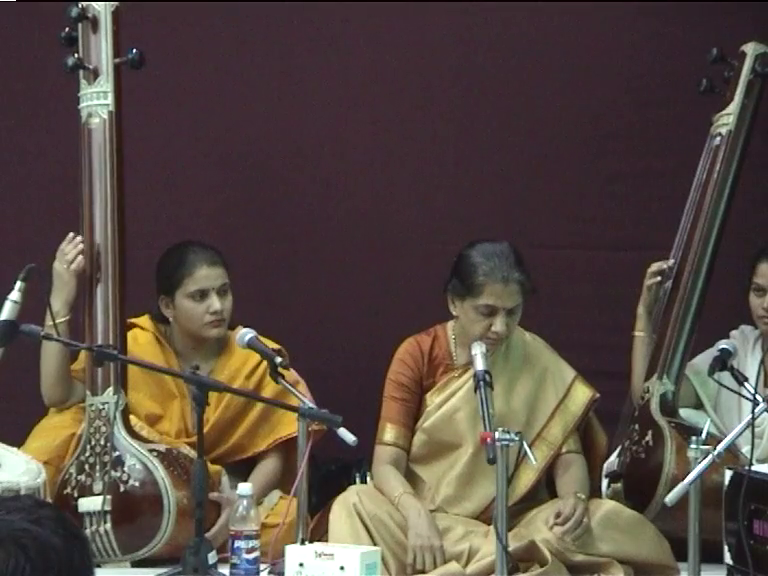

x      0.0
y      0.0
acc    0.0
Name: 12, dtype: float64
-15 15


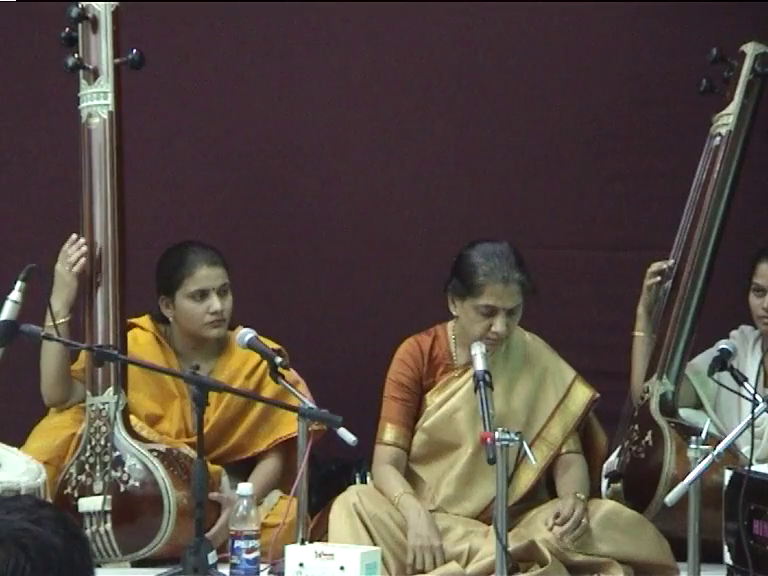

x      0.0
y      0.0
acc    0.0
Name: 13, dtype: float64
-15 15


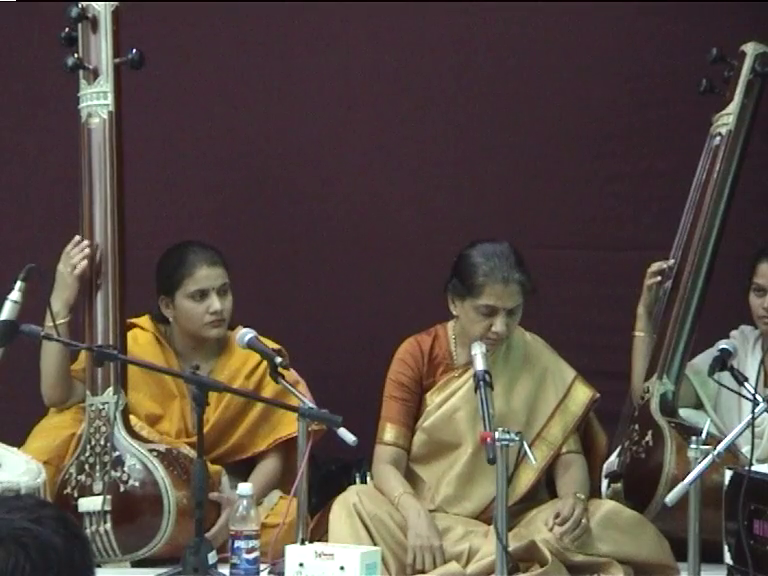

x      0.0
y      0.0
acc    0.0
Name: 14, dtype: float64
-15 15


In [0]:
# Drawing the green box that shows the bar centered over the foot
# pts is in the form [x,y,confidence], for this we only need the first 2 columns [x,y]
# img is the image or frame we're drawing to
def draw_bar_box(img, shoulder_pt, elbow_pt, color_select = (255,255,255)):
    fudge_fact = 20
    shoulder_x = int(np.mean(shoulder_pt['x']))-15
    elbow_x = int(np.mean(elbow_pt['x']))+15
    print(shoulder_x, elbow_x)
    top = 0
    base = height
    
    # call the open cv rectangle function
    cv2.rectangle(img, (shoulder_x,top), (elbow_x, base), color_select, -1)
    
# Drawing a poly-line, a line connecting mutiple nodes
# pts is in the form [x,y,confidence], for this we only need the first 2 columns [x,y]
# img is the image or frame we're drawing to
def draw_poly_line(img, pts, color_select = (255,255,255), thick = 2):
    poly_line_thickness = thick
    poly_closed = False
    pts = pts[:,0:2]
    pts = pts.reshape((-1,1,2))
    
    # call the open cv poly line function
    cv2.polylines(img, np.int32([pts]), poly_closed, color_select, thickness=poly_line_thickness)

import numpy as np
import cv2
from google.colab.patches import cv2_imshow

cap = cv2.VideoCapture('video.mp4')
i = 0

while(cap.isOpened()):
    ret, frame = cap.read()
    print(left_shoulder_df.iloc[i])
    draw_bar_box(frame, left_shoulder_df.iloc[i], left_elbow_df.iloc[i])

    cv2_imshow(frame)
    i += 1
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()



In [0]:
def show_local_mp4_video(file_name, width=640, height=480):
  import io
  import base64
  from IPython.display import HTML
  video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
  return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                      </video>'''.format(width, height, video_encoded.decode('ascii'))) 

show_local_mp4_video('output.mp4', width=960, height=720)